<a href="https://colab.research.google.com/github/Leiryanny/Projetos-de-ETL-Analise-de-Dados/blob/main/UEFA_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UEFA EURO 2024 - ETL e Análise de Dados

#### Sobre o dataset:

Conjunto de dados de todos os jogadores que estão no elenco das equipes que participam da UEFA EURO 2024. Contém informações sobre clubes, idade, altura, valor de mercado etc.

fonte: https://www.kaggle.com/datasets/damirdizdarevic/uefa-euro-2024-players/data

# Extração - Google Cloud (BigQuery)

####**Bibliotecas**##

In [90]:
#Autenticando o usuário no Google Colab
from google.colab import auth

# Interação com o BigQuery
from google.cloud import bigquery

# Manipulação de dados
import pandas as pd
import numpy as np

# Validação de dados com Pandera
!pip install pandera -q
import pandera as pa

####**Autenticação no Google Colab**##

In [5]:
#Autenticando o usuário no Google Colab
auth.authenticate_user()
print('Authenticated')

Authenticated


####**Definição de IDs do Projeto e Dataset e Criação do Cliente BigQuery**

In [15]:
# IDs do projeto e do dataset
project_id = 'portifolio-422706'
dataset_id = 'datasets_portifolio'  # ID do conjunto de dados

# Cria um cliente do BigQuery
client = bigquery.Client(project=project_id)

####**Importação do Dataset**

In [227]:
# Definição da consulta SQL para o dataset
consulta_sql = f"SELECT * FROM `{dataset_id}.euro_2024`"

In [228]:
# Conversão para um datafrae
df_uefa = client.query(consulta_sql).to_dataframe()

In [229]:
# Dataset
df_uefa

,Name,Position,Age,Club,Height,Foot,Caps,Goals,MarketValue,Country
0,Zsolt Nagy,Left-Back,31,Puskás Akadémia FC,188,both,19,3,1000000,Hungary
1,Andrea Cambiaso,Left-Back,24,Juventus FC,182,both,3,0,25000000,Italy
2,David Raum,Left-Back,26,RB Leipzig,180,left,21,0,20000000,Germany
3,Maximilian Mittelstädt,Left-Back,27,VfB Stuttgart,180,left,4,1,17000000,Germany
4,Andrew Robertson,Left-Back,30,Liverpool FC,178,left,69,3,30000000,Scotland
...,...,...,...,...,...,...,...,...,...,...
618,João Palhinha,Defensive Midfield,28,Fulham FC,190,right,26,2,55000000,Portugal
619,João Neves,Defensive Midfield,19,SL Benfica,174,right,6,0,55000000,Portugal
620,Rúben Neves,Defensive Midfield,27,Al-Hilal SFC,180,right,46,0,32000000,Portugal
621,Danilo Pereira,Defensive Midfield,32,Paris Saint-Germain,188,right,72,2,8000000,Portugal


# Transformação

####**Cabeçalho**

In [230]:
# Renomeando o cabeçalho
df_uefa.columns = ['Nome', 'Posição', 'Idade', 'Clube', 'Altura', 'Pé', 'Partidas', 'Gols', 'Valor de Mercado', 'País']

In [231]:
# Visualizando o dataset
df_uefa.head()

,Nome,Posição,Idade,Clube,Altura,Pé,Partidas,Gols,Valor de Mercado,País
0,Zsolt Nagy,Left-Back,31,Puskás Akadémia FC,188,both,19,3,1000000,Hungary
1,Andrea Cambiaso,Left-Back,24,Juventus FC,182,both,3,0,25000000,Italy
2,David Raum,Left-Back,26,RB Leipzig,180,left,21,0,20000000,Germany
3,Maximilian Mittelstädt,Left-Back,27,VfB Stuttgart,180,left,4,1,17000000,Germany
4,Andrew Robertson,Left-Back,30,Liverpool FC,178,left,69,3,30000000,Scotland


####**Dados Ausentes e Tipos de Dados**

In [232]:
# Verificação de dados ausentes isnull
df_uefa.isnull().sum()

Nome                0
Posição             0
Idade               0
Clube               0
Altura              0
Pé                  3
Partidas            0
Gols                0
Valor de Mercado    0
País                0
dtype: int64

In [233]:
# Verificação de dados ausentes isna
df_uefa.isna().sum()

Nome                0
Posição             0
Idade               0
Clube               0
Altura              0
Pé                  3
Partidas            0
Gols                0
Valor de Mercado    0
País                0
dtype: int64

In [234]:
# Filtrar linhas onde a coluna 'Pé' é NaN
df_filtrado_pe_nan = df_uefa[df_uefa['Pé'].isna()]

# Mostrar o DataFrame filtrado
print(df_filtrado_pe_nan.head())


                  Nome         Posição  Idade              Clube  Altura  \
33     Thomas Kaminski      Goalkeeper     31         Luton Town     190   
148   Bogdan Racovițan     Centre-Back     24  Raków Częstochowa     187   
356  Maximilian Entrup  Centre-Forward     26       TSV Hartberg     186   

       Pé  Partidas  Gols  Valor de Mercado     País  
33   None         1     0           3000000  Belgium  
148  None         2     0           1800000  Romania  
356  None         2     1           2000000  Austria  


In [235]:
# Tipos de dados
df_uefa.dtypes

Nome                object
Posição             object
Idade                Int64
Clube               object
Altura               Int64
Pé                  object
Partidas             Int64
Gols                 Int64
Valor de Mercado     Int64
País                object
dtype: object

####**Verificação de Dados Únicos para Tradução**

In [236]:
# Verificação de dados únicos na coluna 'Posição' para tradução
dados_unicos_posicoes = df_uefa['Posição'].unique()
print("Posições únicas em ordem alfabética")
print(sorted(dados_unicos_posicoes)) # Ordem alfabética

Posições únicas em ordem alfabética
['Attacking Midfield', 'Central Midfield', 'Centre-Back', 'Centre-Forward', 'Defensive Midfield', 'Goalkeeper', 'Left Midfield', 'Left Winger', 'Left-Back', 'Right Midfield', 'Right Winger', 'Right-Back', 'Second Striker']


In [237]:
# Quantidade de posições únicas na coluna 'Posição'
qtde_dados_unicos_posicoes = len(dados_unicos_posicoes)
print(f"Quantidade de posições únicas: {qtde_dados_unicos_posicoes}")

Quantidade de posições únicas: 13


In [238]:
# Verificação de dados únicos na coluna 'Pé' para tradução
dados_unicos_pe = df_uefa['Pé'].unique()
dados_unicos_pe

array(['both', 'left', 'right', None, '-'], dtype=object)

In [239]:
# Verificação de dados únicos na coluna 'País' para tradução
dados_unicos_pais = df_uefa['País'].unique()
dados_unicos_pais

array(['Hungary', 'Italy', 'Germany', 'Scotland', 'Spain', 'Croatia',
       'Albania', 'Slovenia', 'England', 'Denmark', 'Serbia', 'Poland',
       'France', 'Belgium', 'Romania', 'Ukraine', 'Portugal',
       'Czech Republic', 'Austria', 'Turkiye', 'Netherlands', 'Georgia',
       'Switzerland', 'Slovakia'], dtype=object)

In [240]:
# Quantidade de dados únicos na coluna 'País'
qtde_dados_unicos_pais = len(dados_unicos_pais)
print(f"Quantidade de posições únicas: {qtde_dados_unicos_pais}")

Quantidade de posições únicas: 24


####**Traduções**

In [241]:
# Dicionário de tradução da coluna 'Posições'
traducao_posicoes = {
    'Attacking Midfield': 'Meio-campo Ofensivo',
    'Central Midfield': 'Meio-campo Central',
    'Centre-Back': 'Zagueiro',
    'Centre-Forward': 'Atacante',
    'Defensive Midfield': 'Volante',
    'Goalkeeper': 'Goleiro',
    'Left Midfield': 'Meio-campo Esquerdo',
    'Left Winger': 'Ponta Esquerda',
    'Left-Back': 'Lateral Esquerdo',
    'Right Midfield': 'Meio-campo Direito',
    'Right Winger': 'Ponta Direita',
    'Right-Back': 'Lateral Direito',
    'Second Striker': 'Segundo Atacante',
    np.nan: 'Não informado'  # Substitui NaN por 'Não informado'
}

In [242]:
# Tradução da coluna 'Posições' no DataFrame
df_uefa['Posição'] = df_uefa['Posição'].map(traducao_posicoes)

# Verificando as posições únicas após a tradução
posicoes_unicas_traduzidas = df_uefa['Posição'].unique()
print("\nPosições únicas após a tradução:")
print(sorted(posicoes_unicas_traduzidas))


Posições únicas após a tradução:
['Atacante', 'Goleiro', 'Lateral Direito', 'Lateral Esquerdo', 'Meio-campo Central', 'Meio-campo Direito', 'Meio-campo Esquerdo', 'Meio-campo Ofensivo', 'Ponta Direita', 'Ponta Esquerda', 'Segundo Atacante', 'Volante', 'Zagueiro']


In [243]:
# Dicionário de tradução para a coluna 'Pé'
traducao_pe = {
    'both': 'Ambos',
    'left': 'Esquerdo',
    'right': 'Direito',
    None: 'Não informado',  # Substituir None por 'Não informado'
    '-': 'Não informado',   # Substituir '-' por 'Não informado'
    np.nan: 'Não informado'  # Substitui NaN por 'Não informado'
}


In [244]:
# Tradução da coluna 'Pé'
df_uefa['Pé'] = df_uefa['Pé'].map(traducao_pe)

In [245]:
# Verificando dados únicos após a tradução
dados_unicos_pe_traduzido = df_uefa['Pé'].unique()
print("\nDados únicos após a tradução:")
print(sorted(dados_unicos_pe_traduzido))


Dados únicos após a tradução:
['Ambos', 'Direito', 'Esquerdo', 'Não informado']


In [246]:
# Dicionário de tradução para a coluna 'País'
traducao_pais = {
    'Hungary': 'Hungria',
    'Italy': 'Itália',
    'Germany': 'Alemanha',
    'Scotland': 'Escócia',
    'Spain': 'Espanha',
    'Croatia': 'Croácia',
    'Albania': 'Albânia',
    'Slovenia': 'Eslovênia',
    'England': 'Inglaterra',
    'Denmark': 'Dinamarca',
    'Serbia': 'Sérvia',
    'Poland': 'Polônia',
    'France': 'França',
    'Belgium': 'Bélgica',
    'Romania': 'Romênia',
    'Ukraine': 'Ucrânia',
    'Portugal': 'Portugal',
    'Czech Republic': 'República Tcheca',
    'Austria': 'Áustria',
    'Turkiye': 'Turquia',
    'Netherlands': 'Países Baixos',
    'Georgia': 'Geórgia',
    'Switzerland': 'Suíça',
    'Slovakia': 'Eslováquia',
    np.nan: 'Não informado'  # Substitui NaN por 'Não informado'
}

In [247]:
# Tradução da coluna 'País'
df_uefa['País'] = df_uefa['País'].map(traducao_pais)

In [248]:
# Verificando dados únicos após a tradução
dados_unicos_pais_traduzido = df_uefa['País'].unique()
print("\nDados únicos após a tradução:")
print(sorted(dados_unicos_pais_traduzido))


Dados únicos após a tradução:
['Albânia', 'Alemanha', 'Bélgica', 'Croácia', 'Dinamarca', 'Escócia', 'Eslováquia', 'Eslovênia', 'Espanha', 'França', 'Geórgia', 'Hungria', 'Inglaterra', 'Itália', 'Países Baixos', 'Polônia', 'Portugal', 'República Tcheca', 'Romênia', 'Suíça', 'Sérvia', 'Turquia', 'Ucrânia', 'Áustria']


In [249]:
# Verificação de dados ausentes novamente isnull
df_uefa.isnull().sum()

Nome                0
Posição             0
Idade               0
Clube               0
Altura              0
Pé                  0
Partidas            0
Gols                0
Valor de Mercado    0
País                0
dtype: int64

In [250]:
# Verificação de dados ausentes novamente isna
df_uefa.isna().sum()

Nome                0
Posição             0
Idade               0
Clube               0
Altura              0
Pé                  0
Partidas            0
Gols                0
Valor de Mercado    0
País                0
dtype: int64

####**Duplicatas**

In [251]:
# Localizando Nomes duplicados
nomes_duplicados = df_uefa[df_uefa['Nome'].duplicated(keep=False)]

# Contar a quantidade de cada ID
contagem_nomes = df_uefa['Nome'].value_counts()

# Filtrar apenas os Nomes que são duplicados (ocorrem mais de uma vez)
nomes_duplicados = contagem_nomes[contagem_nomes > 1]

# Exibir a quantidade de NOmes duplicados
qtde_nomes_duplicados = len(nomes_duplicados)
print("Quantidade de Nomes duplicados:", qtde_nomes_duplicados)

Quantidade de Nomes duplicados: 0


####**Máximos e Mínimos**

In [252]:
# Encontrar o máximo e mínimo da coluna 'Idade'
idade_maxima = df_uefa['Idade'].max()
idade_minima = df_uefa['Idade'].min()

print(f"Máximo de Idade: {idade_maxima} anos")
print(f"Mínimo de Idade: {idade_minima} anos")

Máximo de Idade: 41 anos
Mínimo de Idade: 16 anos


####**Informações do Dataset Tratado**

In [253]:
# Visualição do dataset
df_uefa

,Nome,Posição,Idade,Clube,Altura,Pé,Partidas,Gols,Valor de Mercado,País
0,Zsolt Nagy,Lateral Esquerdo,31,Puskás Akadémia FC,188,Ambos,19,3,1000000,Hungria
1,Andrea Cambiaso,Lateral Esquerdo,24,Juventus FC,182,Ambos,3,0,25000000,Itália
2,David Raum,Lateral Esquerdo,26,RB Leipzig,180,Esquerdo,21,0,20000000,Alemanha
3,Maximilian Mittelstädt,Lateral Esquerdo,27,VfB Stuttgart,180,Esquerdo,4,1,17000000,Alemanha
4,Andrew Robertson,Lateral Esquerdo,30,Liverpool FC,178,Esquerdo,69,3,30000000,Escócia
...,...,...,...,...,...,...,...,...,...,...
618,João Palhinha,Volante,28,Fulham FC,190,Direito,26,2,55000000,Portugal
619,João Neves,Volante,19,SL Benfica,174,Direito,6,0,55000000,Portugal
620,Rúben Neves,Volante,27,Al-Hilal SFC,180,Direito,46,0,32000000,Portugal
621,Danilo Pereira,Volante,32,Paris Saint-Germain,188,Direito,72,2,8000000,Portugal


In [254]:
# Informações do dataset
df_uefa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Nome              623 non-null    object
 1   Posição           623 non-null    object
 2   Idade             623 non-null    Int64 
 3   Clube             623 non-null    object
 4   Altura            623 non-null    Int64 
 5   Pé                623 non-null    object
 6   Partidas          623 non-null    Int64 
 7   Gols              623 non-null    Int64 
 8   Valor de Mercado  623 non-null    Int64 
 9   País              623 non-null    object
dtypes: Int64(5), object(5)
memory usage: 51.8+ KB


####**Validação do Dataframe**

In [255]:
# Definição do esquema de validação com Pandera
schema = pa.DataFrameSchema({
    'Nome': pa.Column(pa.String),
    'Posição': pa.Column(pa.String),
    'Idade': pa.Column(pa.Int),
    'Clube': pa.Column(pa.String),
    'Altura': pa.Column(pa.Int),
    'Pé': pa.Column(pa.String),
    'Partidas': pa.Column(pa.Int),
    'Gols': pa.Column(pa.Int),
    'Valor de Mercado': pa.Column(pa.Int),
    'País': pa.Column(pa.String),
})

# Validar o DataFrame com base no esquema
try:
    schema.validate(df_uefa)
    print("Validação bem-sucedida!")
except pa.errors.SchemaError as e:
    print(f"Erro de validação:\n{e}")


Validação bem-sucedida!


# Carregamento

In [256]:
# Importando biblioteca para salvamento no Google Drive
from google.colab import drive

# Montagem do drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [257]:
# Salvar os dados tratados no Google Drive
df_uefa.to_csv('/content/drive/MyDrive/exploratory-data-analysis/tratados/uefa_2024_tratado.csv')

# Análise Descritiva Simples

In [258]:
# Bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

####**Distribuição de Idades dos Jogadores**

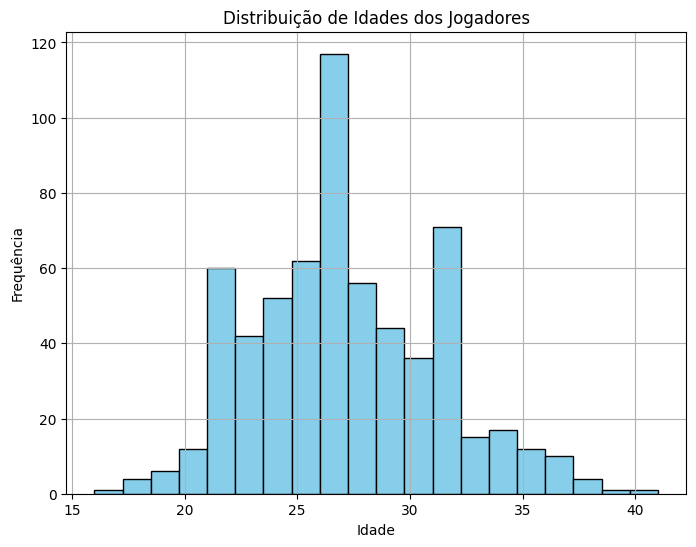

In [259]:
# Histograma da distribuição de idades com cor modificada
plt.figure(figsize=(8, 6))
plt.hist(df_uefa['Idade'], bins=20, edgecolor='black', color='skyblue')
plt.title('Distribuição de Idades dos Jogadores')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()


Concentração de Idades: A maioria dos jogadores está na faixa dos 25 anos. Isso é evidenciado pelo pico significativo no histograma nessa idade.

Declínio com a Idade: À medida que a idade aumenta além dos 25 anos, a frequência de jogadores diminui. Isso sugere que há menos jogadores mais velhos no grupo.

Faixas Etárias Menos Comuns: As idades próximas a 15 anos e 40 anos têm frequências mais baixas. Isso indica que essas faixas etárias são menos comuns entre os jogadores.

Assimetria à Direita: A distribuição é assimétrica à direita (ou seja, tem uma cauda longa à direita). Isso significa que há menos jogadores mais velhos em comparação com os mais jovens.

In [204]:
# Calcular estatísticas descritivas da coluna 'Idade'
estatisticas_idade = df_uefa['Idade'].describe()

# Exibir as estatísticas
print(estatisticas_idade)

count        623.0
mean     27.040128
std       4.124275
min           16.0
25%           24.0
50%           27.0
75%           30.0
max           41.0
Name: Idade, dtype: Float64


A maioria dos jogadores (50% representados pela mediana) tem entre 24 e 30 anos.
A idade média dos jogadores é de cerca de 27 anos, com uma dispersão razoável em torno dessa média (desvio padrão de aproximadamente 4.12 anos).
A distribuição das idades é inclinada para idades mais jovens, com o jogador mais velho tendo 41 anos.

####**Posições Mais Comuns dos Jogadores**

In [260]:
# Contagem de posições
posicoes_contagem = df_uefa['Posição'].value_counts()

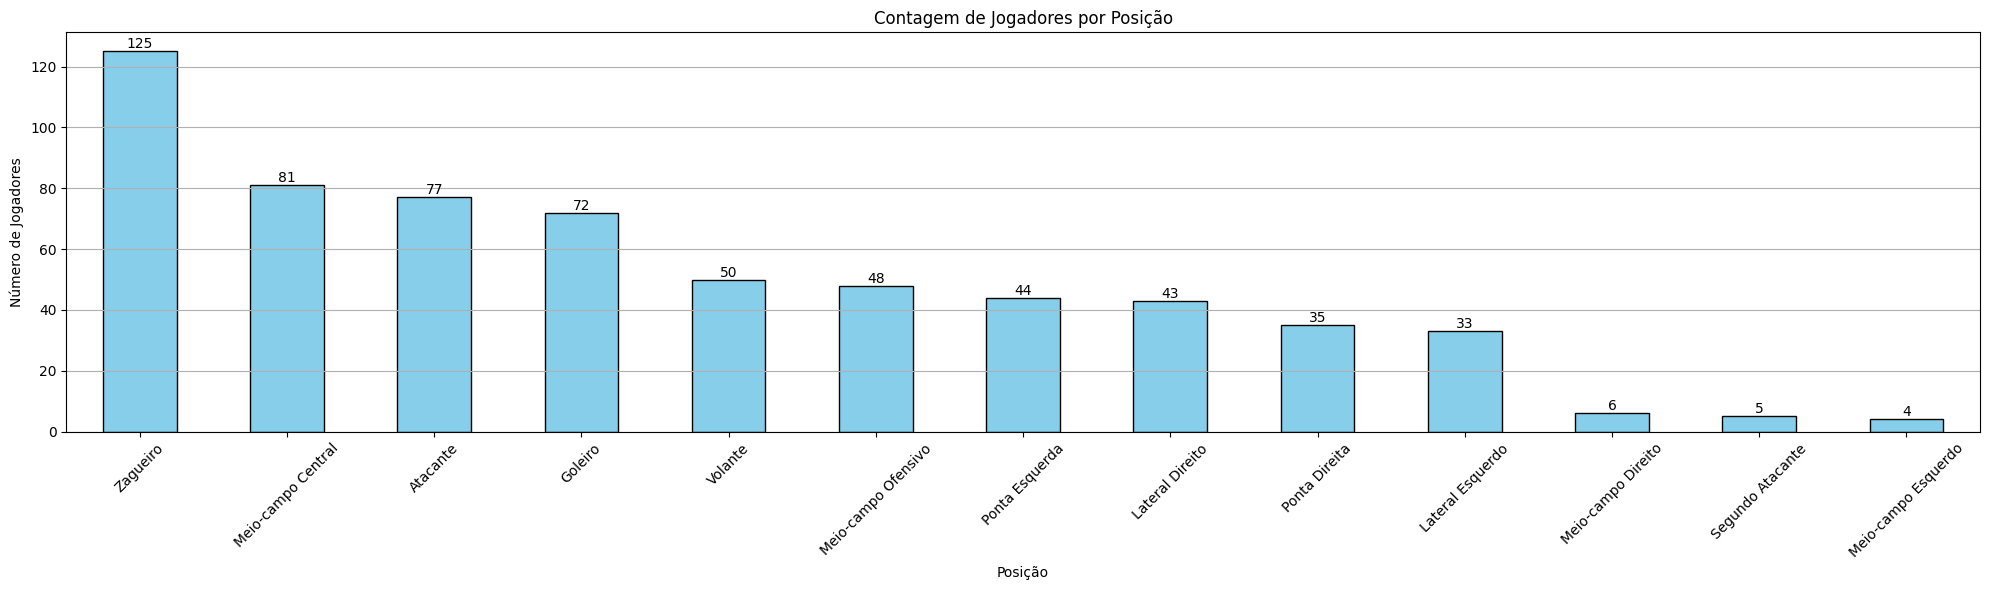

In [261]:
# Gráfico de barras das posições mais comuns
plt.figure(figsize=(20, 6))
bars = posicoes_contagem.plot(kind='bar', edgecolor='black', color='skyblue')

plt.title('Contagem de Jogadores por Posição')
plt.xlabel('Posição')
plt.ylabel('Número de Jogadores')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Adicionar rótulos acima das barras
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.0f'),
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()


####**Altura Média por Posição**

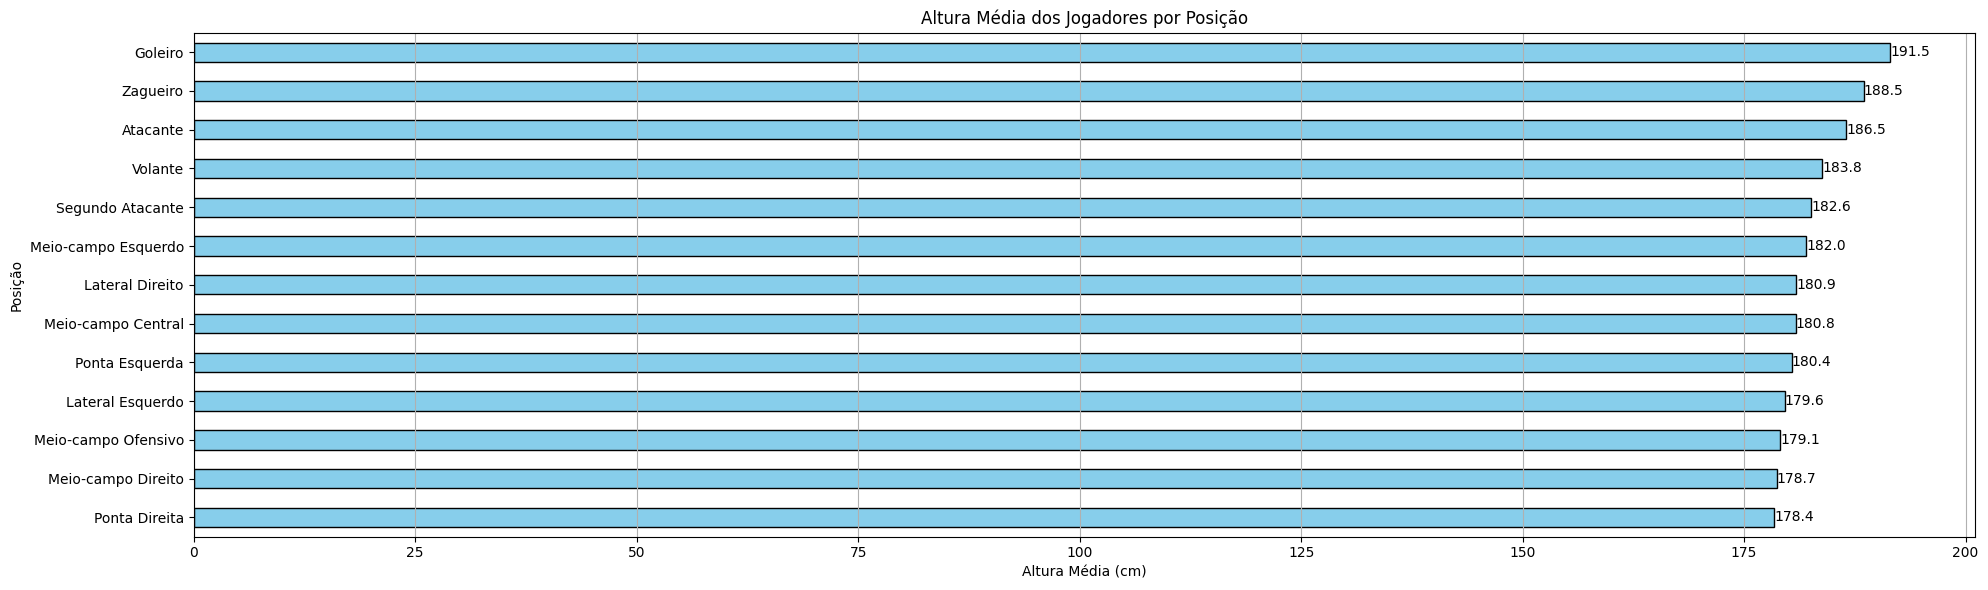

In [262]:
# Calcular a altura média dos jogadores para cada posição
altura_media_por_posicao = df_uefa.groupby('Posição')['Altura'].mean().sort_values()

# Gráfico de barras da altura média por posição
plt.figure(figsize=(20, 6))
bars = altura_media_por_posicao.plot(kind='barh', edgecolor='black', color='skyblue')
plt.title('Altura Média dos Jogadores por Posição')
plt.xlabel('Altura Média (cm)')
plt.ylabel('Posição')
plt.grid(axis='x')

# Adicionar rótulos ao lado das barras
for bar in bars.patches:
    plt.annotate(format(bar.get_width(), '.1f'),
                 (bar.get_width(), bar.get_y() + bar.get_height() / 2),
                 ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()


**Distribuição de Altura**
Observa-se que a altura dos jogadores varia significativamente entre as diferentes posições. Isso sugere que cada posição requer características físicas específicas para desempenhar bem no esporte.

**Estratégia Tática**
A altura pode influenciar a estratégia tática de uma equipe. Por exemplo, zagueiros mais altos podem ser mais eficazes na defesa de bolas aéreas, enquanto meias-atacantes ágeis e baixos podem driblar com facilidade.

**Adaptação ao Estilo de Jogo**
Times podem escolher jogadores com base na altura para se adaptarem ao estilo de jogo desejado. Por exemplo, um time que prioriza cruzamentos na área pode preferir atacantes mais altos.

**Equilíbrio da Equipe**
A combinação de jogadores de diferentes alturas pode criar um equilíbrio ideal na equipe. Altura não é tudo; habilidades técnicas e táticas também são cruciais.

Esses insights são baseados apenas na média e há exceções individuais. Cada jogador é único e o sucesso no esporte depende de uma combinação de fatores físicos, técnicos e mentais.

####**Valor de Mercado por País**

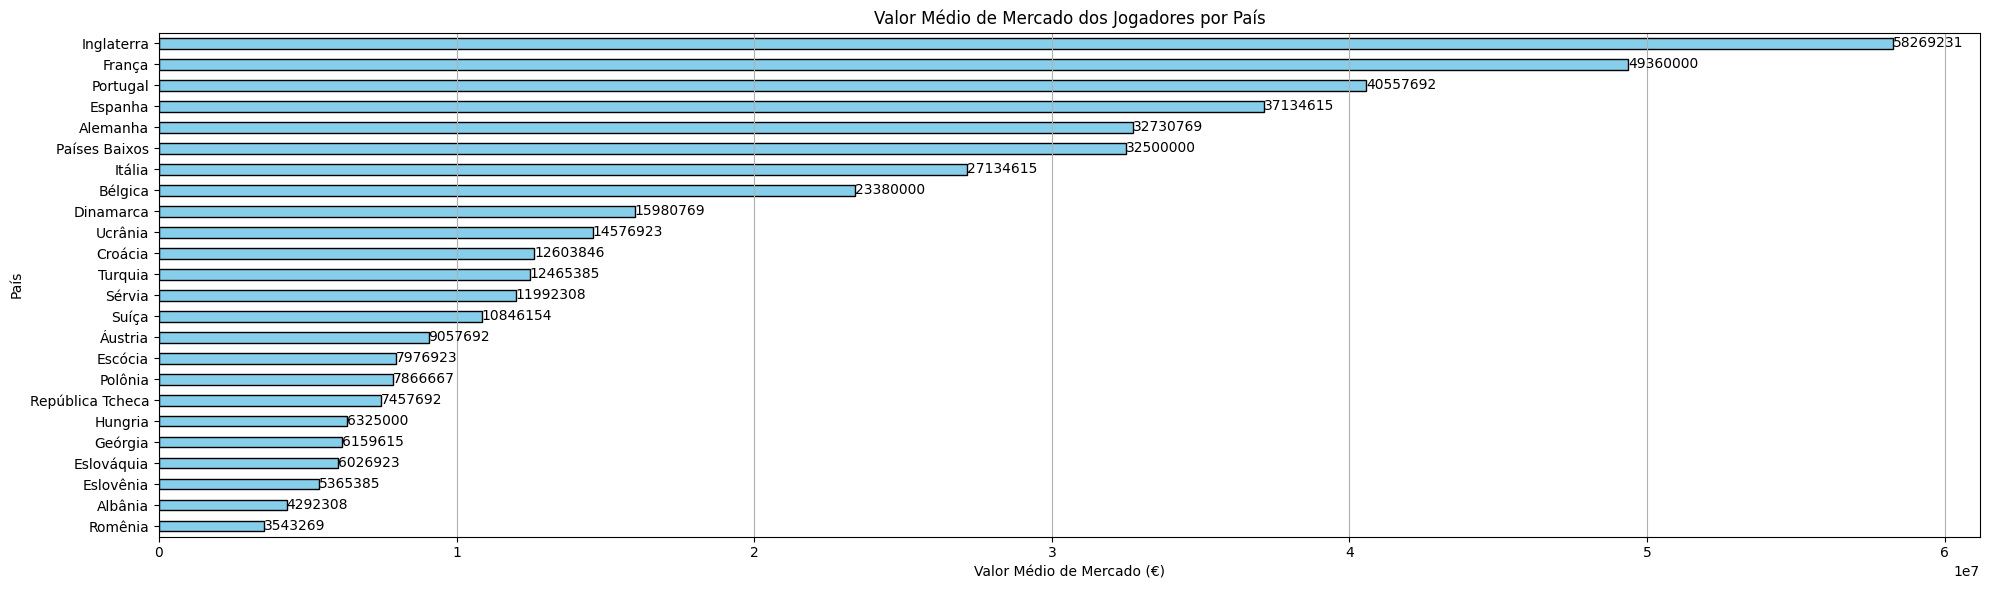

In [263]:
# Cálculo do valor médio de mercado dos jogadores para cada país
valor_mercado_por_pais = df_uefa.groupby('País')['Valor de Mercado'].mean().sort_values()

# Gráfico de barras do valor de mercado médio por país
plt.figure(figsize=(20, 6))
bars = valor_mercado_por_pais.plot(kind='barh', edgecolor='black', color='skyblue')
plt.title('Valor Médio de Mercado dos Jogadores por País')
plt.xlabel('Valor Médio de Mercado (€)')
plt.ylabel('País')
plt.grid(axis='x')

# Adicionar rótulos ao lado das barras
for bar in bars.patches:
    plt.annotate(format(bar.get_width(), '.0f'),
                 (bar.get_width(), bar.get_y() + bar.get_height() / 2),
                 ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()


 **Inglaterra**: Liderando o ranking, a Inglaterra possui o maior valor médio de mercado para jogadores de futebol, com cerca de €58.269.231. Isso pode ser atribuído à competitividade da Premier League e ao alto investimento em talentos.

**França**: Em segundo lugar, a França apresenta um valor médio de €49.360.000. A Ligue 1 e a qualidade de seus jogadores contribuem para essa posição.

**Portugal**: Logo atrás, Portugal tem um valor médio de €40.557.692. O sucesso da seleção nacional e a exportação de jogadores talentosos são fatores relevantes.

Esses valores refletem não apenas a qualidade dos jogadores em cada país, mas também a dinâmica do mercado global de transferências. As estratégias dos clubes, a competitividade das ligas, e a capacidade de atrair e desenvolver talentos são fatores-chave que influenciam esses valores.

####**Análise de Pés Dominantes**

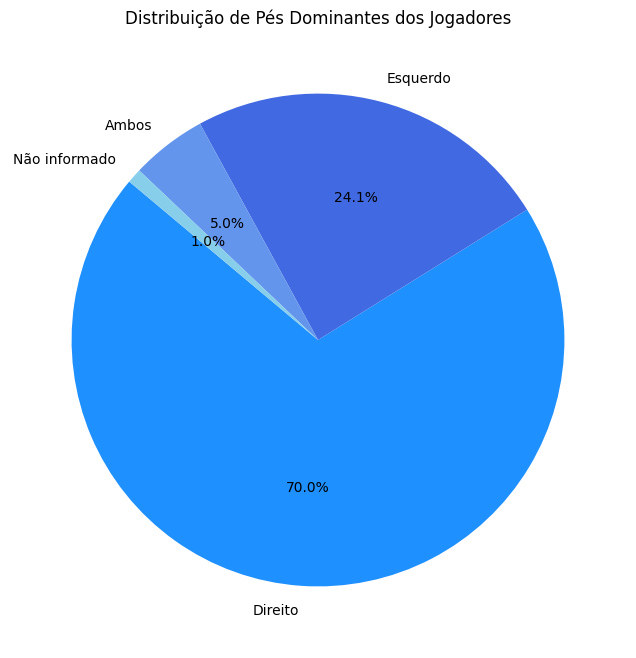

In [283]:
# Dados e plotagem inicial
pes_contagem = df_uefa['Pé'].value_counts()
plt.figure(figsize=(8, 8))

# Definindo a paleta de cores em tons de azul
cores_azul = ['#1E90FF', '#4169E1', '#6495ED', '#87CEEB']

# Plotando o gráfico de pizza
pes_contagem.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=cores_azul)
plt.title('Distribuição de Pés Dominantes dos Jogadores')
plt.ylabel('')
plt.show()


**Pé Esquerdo**: Cerca de 24,1% dos jogadores têm o pé esquerdo como dominante. Isso pode ser relevante para estratégias de jogo, especialmente quando se trata de cruzamentos e chutes de longa distância.

**Ambos os Pés**: Aproximadamente 5,0% dos jogadores são ambidestros, o que significa que têm habilidades semelhantes com ambos os pés. Esses jogadores podem ser versáteis em diferentes posições e situações de jogo.

**Não Informado**: Há uma pequena porcentagem (1,0%) de jogadores cuja preferência de pé não foi informada.

**Pé Direito**: A maioria (70,0%) dos jogadores tem o pé direito como dominante. Isso é importante para treinadores ao planejar estratégias específicas para cada posição em campo.

Essa distribuição de pés dominantes pode influenciar a forma como os jogadores se movimentam, driblam e finalizam durante as partidas.

####**Top 10 Jogadores por Gols Marcados**

In [288]:
# Organização dos jogadores pelo número de gols em ordem decrescente e selecionar os top 10
top_gols = df_uefa.sort_values(by='Gols', ascending=False).head(10)

# Exibir os top 10 jogadores por gols
print("Top 10 Jogadores por Gols Marcados:")
print(top_gols[['Nome', 'Posição', 'Gols', 'Clube', 'País']])

Top 10 Jogadores por Gols Marcados:
                    Nome           Posição  Gols                Clube  \
430    Cristiano Ronaldo          Atacante   128          Al-Nassr FC   
372        Romelu Lukaku          Atacante    83              AS Roma   
410   Robert Lewandowski          Atacante    82         FC Barcelona   
401           Harry Kane          Atacante    63        Bayern Munich   
407  Aleksandar Mitrovic          Atacante    57         Al-Hilal SFC   
371       Olivier Giroud          Atacante    57             AC Milan   
415        Kylian Mbappé          Atacante    47  Paris Saint-Germain   
336    Andriy Yarmolenko     Ponta Direita    46          Dynamo Kyiv   
440        Thomas Müller  Segundo Atacante    45        Bayern Munich   
413        Memphis Depay          Atacante    45   Atlético de Madrid   

              País  
430       Portugal  
372        Bélgica  
410        Polônia  
401     Inglaterra  
407         Sérvia  
371         França  
415         F

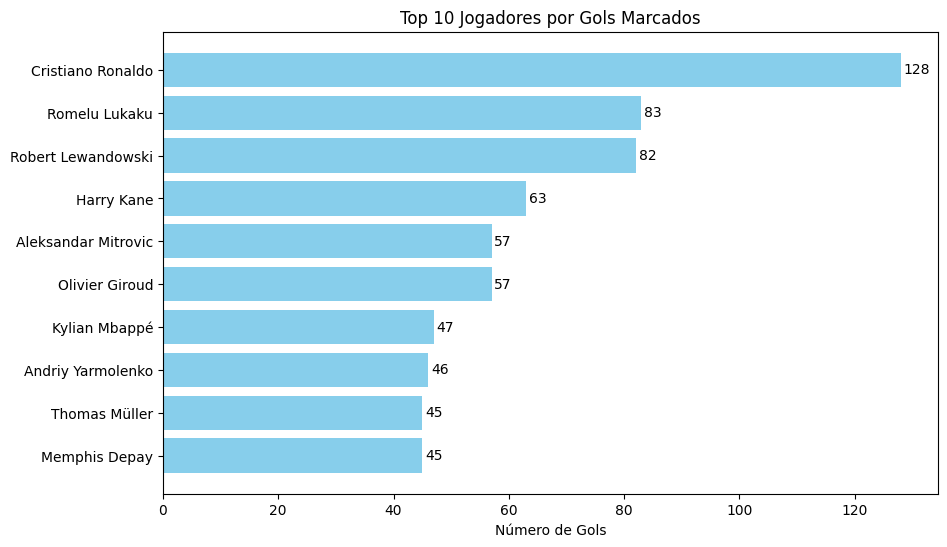

In [289]:
# Criar o gráfico de barras horizontais
plt.figure(figsize=(10, 6))
bars = plt.barh(top_gols['Nome'], top_gols['Gols'], color='skyblue')
plt.xlabel('Número de Gols')
plt.title('Top 10 Jogadores por Gols Marcados')

# Adicionar rótulos acima das barras
for bar in bars:
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, f'{bar.get_width():.0f}',
             va='center', ha='left', fontsize=10, color='black')

plt.gca().invert_yaxis()  # Inverter a ordem para o jogador com mais gols ficar no topo
plt.show()


####**Top 10 Jogadores por Valor de Mercado**

In [290]:
# Organização dos jogadores pelo valor de mercado em ordem decrescente e selecionar os top 10
top_valor_mercado = df_uefa.sort_values(by='Valor de Mercado', ascending=False).head(10)

# Exibir os top 10 jogadores por valor de mercado
print("\nTop 10 Jogadores por Valor de Mercado:")
print(top_valor_mercado[['Nome', 'Posição', 'Valor de Mercado', 'Clube', 'País']])



Top 10 Jogadores por Valor de Mercado:
                    Nome              Posição  Valor de Mercado  \
415        Kylian Mbappé             Atacante         180000000   
559      Jude Bellingham  Meio-campo Ofensivo         180000000   
325           Phil Foden        Ponta Direita         150000000   
326          Bukayo Saka        Ponta Direita         140000000   
548        Florian Wirtz  Meio-campo Ofensivo         130000000   
549        Jamal Musiala  Meio-campo Ofensivo         120000000   
586                Rodri              Volante         120000000   
595          Declan Rice              Volante         120000000   
605  Aurélien Tchouaméni              Volante         100000000   
459    Eduardo Camavinga   Meio-campo Central         100000000   

                   Clube        País  
415  Paris Saint-Germain      França  
559          Real Madrid  Inglaterra  
325      Manchester City  Inglaterra  
326           Arsenal FC  Inglaterra  
548  Bayer 04 Leverkusen   

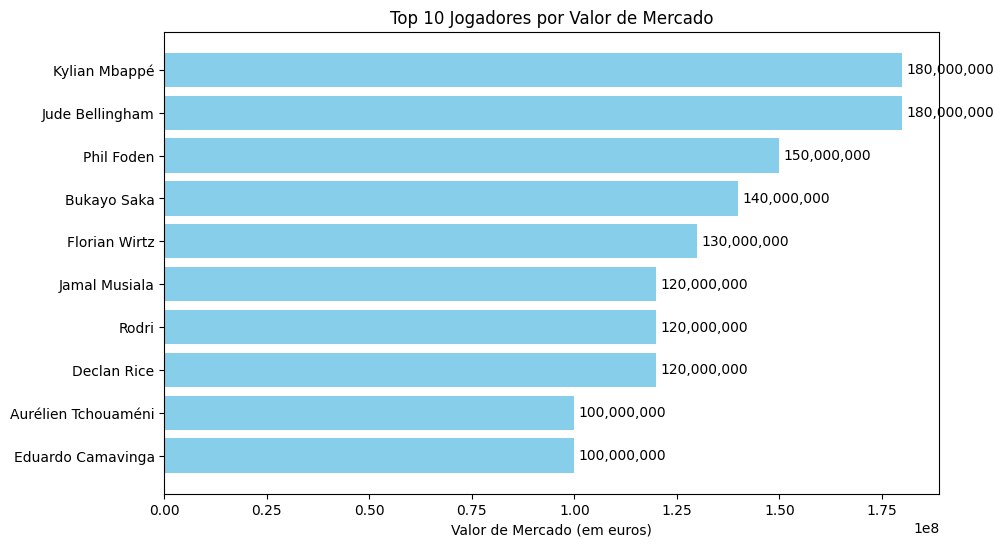

In [292]:
# Criar o gráfico de barras horizontais
plt.figure(figsize=(10, 6))
bars = plt.barh(top_valor_mercado['Nome'], top_valor_mercado['Valor de Mercado'], color='skyblue')
plt.xlabel('Valor de Mercado (em euros)')
plt.title('Top 10 Jogadores por Valor de Mercado')

# Adicionar rótulos acima das barras
for bar in bars:
    plt.text(bar.get_width() + 1e6, bar.get_y() + bar.get_height()/2, f'{bar.get_width():,.0f}',
             va='center', ha='left', fontsize=10, color='black')

plt.gca().invert_yaxis()  # Inverter a ordem para o jogador com maior valor de mercado ficar no topo
plt.show()


####**Top 10 Jogadores por Número de Partidas Disputadas**

In [294]:
# Ordenar os jogadores pelo número de partidas disputadas em ordem decrescente e selecionar os top 10
top_partidas = df_uefa.sort_values(by='Partidas', ascending=False).head(10)

# Exibir os top 10 jogadores por número de partidas disputadas
print("\nTop 10 Jogadores por Número de Partidas Disputadas:")
print(top_partidas[['Nome', 'Posição', 'Partidas', 'Clube', 'País']])


Top 10 Jogadores por Número de Partidas Disputadas:
                   Nome             Posição  Partidas               Clube  \
430   Cristiano Ronaldo            Atacante       206         Al-Nassr FC   
478         Luka Modric  Meio-campo Central       174         Real Madrid   
170      Jan Vertonghen            Zagueiro       154      RSC Anderlecht   
410  Robert Lewandowski            Atacante       149        FC Barcelona   
267                Pepe            Zagueiro       136            FC Porto   
371      Olivier Giroud            Atacante       132            AC Milan   
246         Axel Witsel            Zagueiro       131  Atlético de Madrid   
221          Simon Kjær            Zagueiro       131            AC Milan   
274        Ivan Perisic      Ponta Esquerda       130    HNK Hajduk Split   
440       Thomas Müller    Segundo Atacante       129       Bayern Munich   

          País  
430   Portugal  
478    Croácia  
170    Bélgica  
410    Polônia  
267   Portugal

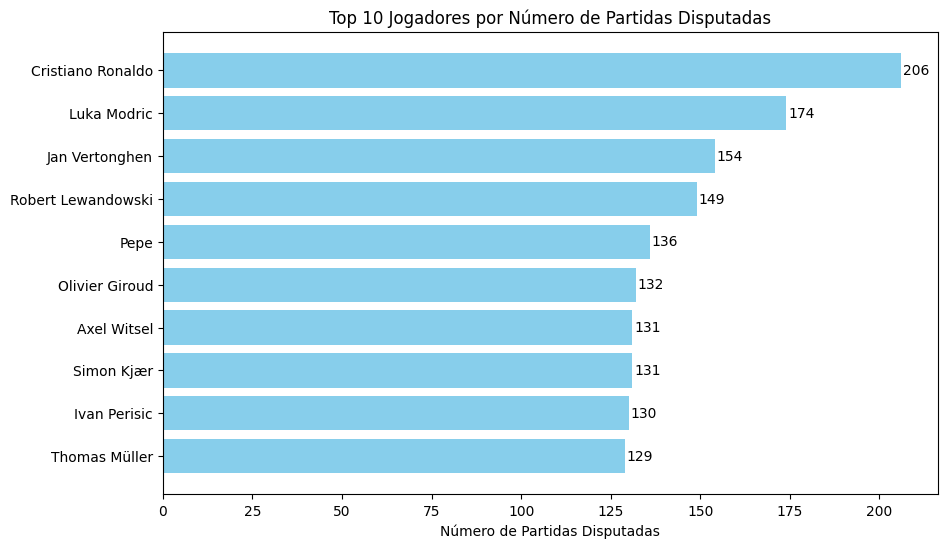

In [296]:
# Criar o gráfico de barras horizontais
plt.figure(figsize=(10, 6))
bars = plt.barh(top_partidas['Nome'], top_partidas['Partidas'], color='skyblue')
plt.xlabel('Número de Partidas Disputadas')
plt.title('Top 10 Jogadores por Número de Partidas Disputadas')

# Adicionar rótulos acima das barras
for bar in bars:
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, f'{bar.get_width():.0f}',
             va='center', ha='left', fontsize=10, color='black')

plt.gca().invert_yaxis()  # Inverter a ordem para o jogador com mais partidas ficar no topo
plt.show()